# [개념 필사]

# CHAPTER 07 <군집화>

## 01. K-평균 알고리즘

> **K-평균: 군집 중심점을 임의로 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법. 가장 일반적.**

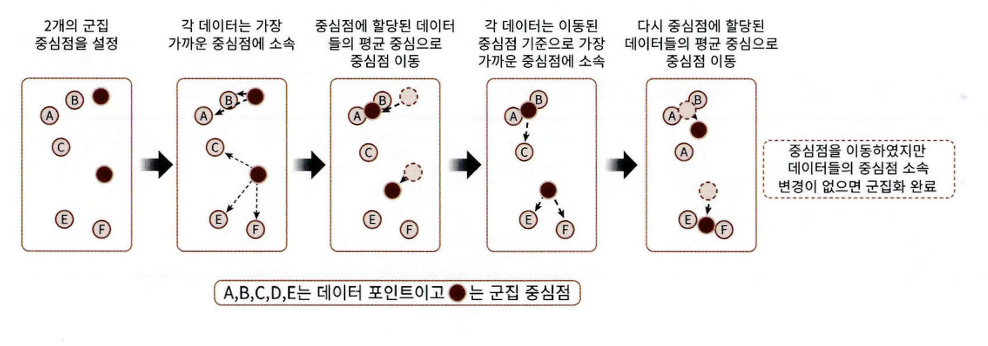

* 군집중심점은 선택된 포인트의 평균 지점으로 이동. 다시 가까운 포인트 선택. 다시 중심점 이동 ... 반복
* 중심점 이동 중단 시, 각 중심점에 속하는 포인트들을 군집화
* 거리 기반 알고리즘
* 비지도 학습
* 속성 개수가 많을수록 정확도 감소
* 군집 개수 지정 어려움

```
KMeans 사이킷런 클래스

class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=O.0001, precompute_distances='auto', verbose=0, random_state=None,
copy_x=True, n_Jobs=1, algorithm='auto')

* n_clusters: 군집화할 개수, 군집 중심점의 개수

* init: 초기에 군집 중심점의 좌표를 설정할 방식

* max_iter: 최대 반복 횟수

* labels_ 속성: 각 데이터 포인트가 속한 군집 중심점 레이블

* cluster_centers_ 속성: 각 군집 중심점 좌표. 시각화에 활용
```

> **군집화 알고리즘 테스트를 위한 데이터 생성**

```
make_blobs(), make_classification(), make_circle(), make_moon()

make_blobs() 파라미터

* n_samples: 생성할 총 데이터 개수. 디폴트 100

* n_features: 데이터 피처 개수

* centers: 군집의 개수(int값), 개별 군집 중심점 좌표 (ndarray형태)

* cluster_std: 생성될 군집 데이터의 표준 편차
```

## 02. 군집 평가

* 대부분의 군집화 데이터 세트, 비교할 만한 타깃 레이블 X.

* 분류와 많은 차이점


> **실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼있는지. (= 군집 간 멀고, 군집 내 가까움)**

* 실루엣 계수: 개별 데이터가 가지는 군집화 지표. 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝고, 다른 군집의 데이터와 얼마나 먼지를 나타내는 지표. / -1과 1 사이값

  -- a(i) - 군집 내 다른 포인트와의 거리의 평균값

  -- b(i) - 가장 가까운 다른 군집과의 거리의 평균값

  -- s(i) = [b(i) - a(i)] / [ max(a(i), b(i)) ]

  -- 1에 가까울수록 근처 군집과 더 멀리 떨어져있음

  -- 0에 가까울수록 근처 군집과 더 가까이있음

```
sklearn.metrics.silhouette_samples(X, labels, metric= 'euclidean', **kwds): 각 데이터 포인트의 실루엣 계수 반환

sklearn.metrics.silhouette_score(X, labels, metric= 'euclideansam이e_size=None, **kwds): 전체 데이터의 실루엣 계수값 평균값 반환. np.mean(silhouette_samples()). 보통 이 값이 높을수록 군집화 잘됨 (무조건X)
```

* 좋은 군집화 조건: silhouette_score값이 0~1 사이 / 개별 군집의 실루엣 계수 평균값이 전체 실루엣 평균값에서 크게 벗어나지 않아야함.

* 단점: 데이터양이 많을 경우 수행 시간 증가, 에러 발생 쉬움


> **군집 개수 최적화 방법 (실루엣 계수 시각화 활용)**

* visualize_silhouette() 함수




# [코드 필사]

* 붓꽃 데이터 K-평균 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 df 으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 3개 그룹으로 군집화

kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(irisDF) # 군집화 수행 결과가 kmeans객체 변수로 반환됨

KMeans(max_iter=200, n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# 실제 품종 분류값과 비교

irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
# 군집화 시각화
# PCA로 2차원 축소 후, 표현

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


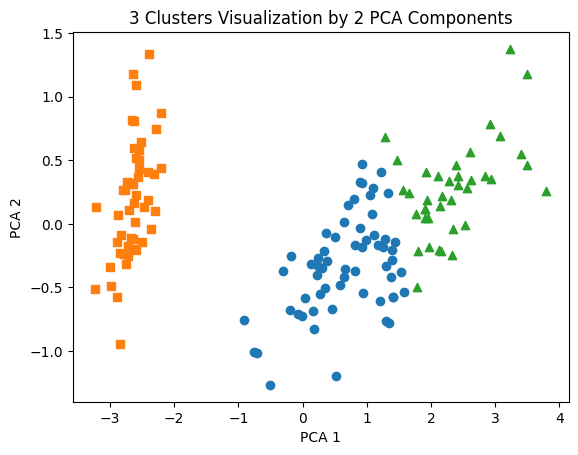

In [6]:
# 군집값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

* 데이터 생성

In [8]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


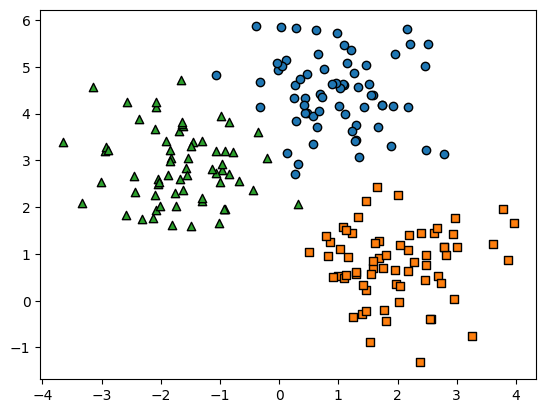

In [10]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

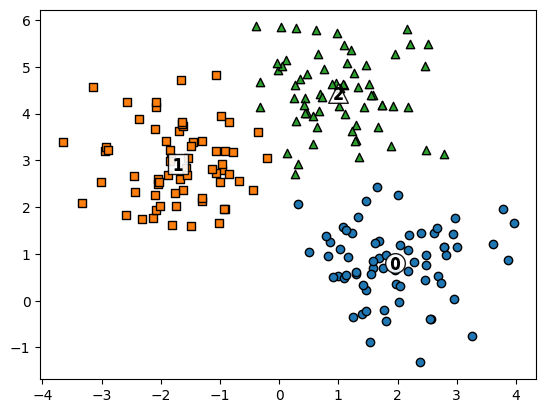

In [12]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='$%d$' % label)

plt.show()

In [14]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


* 붓꽃 데이터세트 군집 평가

In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수값 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples(  ) returen 값의 shape',score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples(  ) returen 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [16]:
# 군집별 평균 실루엣 계수값 확인

irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


* visualize_silhouette() : 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때 개별 군집별 평균 실루엣 계수값 시각화

   -- 군집 개수 정하는 데 유용

In [17]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

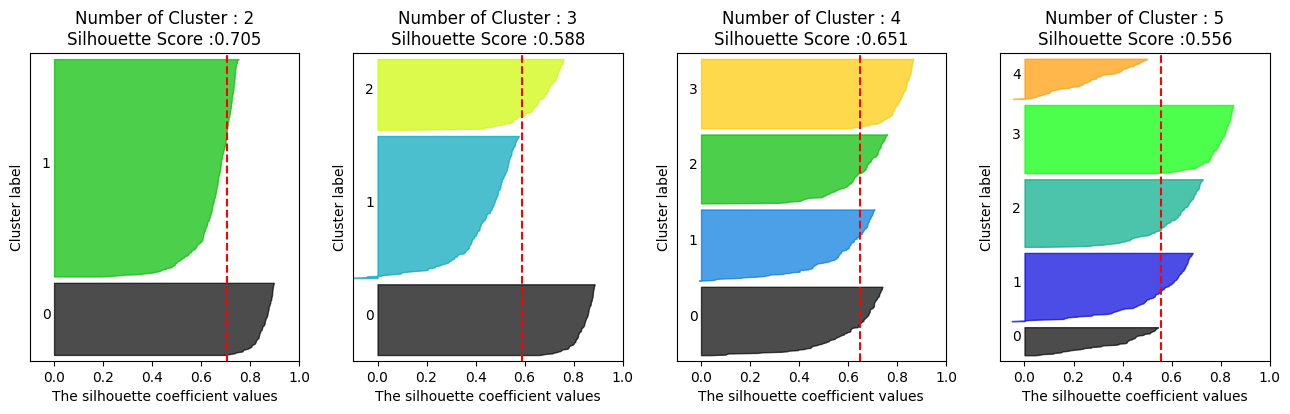

In [18]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                 center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2, 3, 4, 5개일 때의 군집별 실루엣 계수 평균값 시각화
visualize_silhouette([2,3,4,5],X)

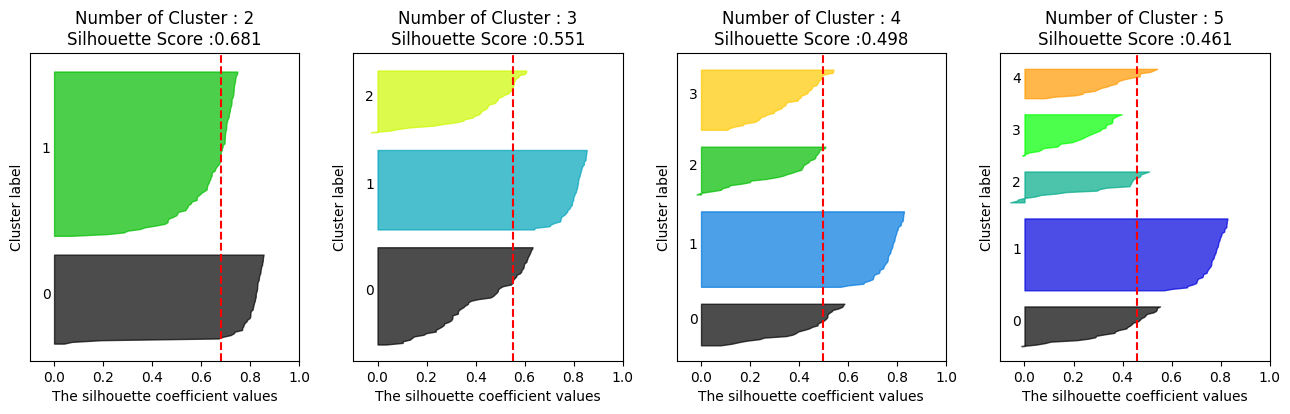

In [20]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)